# 1. Definiendo Redes Neuronales en PyTorch

Ha llegado la hora del plato principal: ¡Redes neuronales!

## Preliminares

Importemos las librerías que usaremos.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import utils

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

## Data

Como de costumbre, con propósitos demostrativos, nos apoyaremos en el conjunto de datos MNIST.

Para importarlo, usaremos el paquete `torchvision`.

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [3]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

Hemos descargado el conjunto de pruebas y de entrenamiento. Al colocar los datos en un `DataLoader` podremos acceder cada lote de información mediante un iterador (más adelante).

Echemos un vistazo a una imagen de muestra.

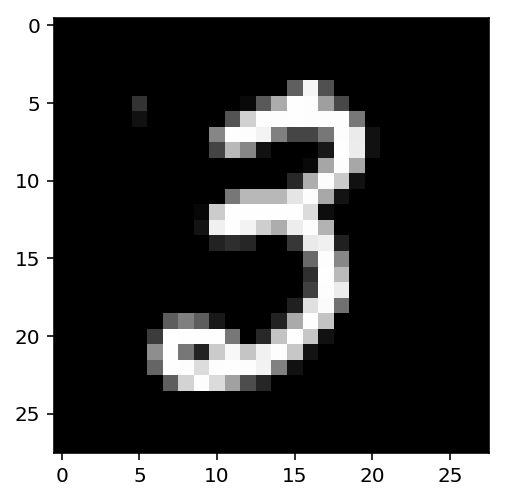

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

## Construyendo Redes en PyTorch

Hay muchas formas de construir una red neuronal en PyTorch.

En la celda de abajo estamos creando una subclase de `nn.Module` para modelar la arquitectura de nuestra red.

Fíjate en que, la arquitectura como tal, la estamos definiendo en el constructor, mientras que el método `forward` especifica las operaciones necesarias para propagar la información hacia delante en la red.

PyTorch soporta equivalentes funcionales para cosas como ReLUs o funciones de activación como softmax. Aquí estamos usándolas bajo el alias `F` que le dimos al paquete `torch.nn.functional`.

In [5]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fully_connected_1 = nn.Linear(784, 128)
        self.fully_connected_2 = nn.Linear(128, 64)
        self.fully_connected_3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fully_connected_1(x)
        x = F.relu(x)
        x = self.fully_connected_2(x)
        x = F.relu(x)
        x = self.fully_connected_3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model

Network(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (fully_connected_3): Linear(in_features=64, out_features=10, bias=True)
)

### Inicializando los pesos y _biases_

Ambos son iniciados automáticamente, pero podemos sobreescribirlos si queremos.

Éstos son tensores almacenados como miembros de cada capa.

In [6]:
print(model.fully_connected_1.weight)
print(model.fully_connected_1.bias)

Parameter containing:
tensor([[ 0.0326,  0.0228, -0.0310,  ...,  0.0218,  0.0339, -0.0046],
        [ 0.0137, -0.0112, -0.0206,  ...,  0.0184, -0.0125, -0.0350],
        [ 0.0149, -0.0148, -0.0295,  ...,  0.0258,  0.0101, -0.0170],
        ...,
        [ 0.0012,  0.0308, -0.0005,  ..., -0.0200,  0.0170,  0.0072],
        [-0.0129,  0.0275,  0.0207,  ...,  0.0219, -0.0276,  0.0338],
        [ 0.0245, -0.0036,  0.0288,  ...,  0.0060, -0.0067,  0.0277]],
       requires_grad=True)
Parameter containing:
tensor([-0.0063,  0.0080,  0.0192, -0.0143, -0.0038,  0.0241, -0.0184, -0.0194,
        -0.0048, -0.0245,  0.0209, -0.0109,  0.0292, -0.0073, -0.0121, -0.0193,
         0.0087, -0.0044, -0.0040,  0.0299, -0.0214,  0.0170,  0.0114, -0.0145,
        -0.0186, -0.0011, -0.0102,  0.0035, -0.0081, -0.0027,  0.0016, -0.0118,
         0.0128,  0.0106, -0.0012,  0.0169,  0.0093,  0.0209, -0.0248, -0.0159,
         0.0292,  0.0153,  0.0221, -0.0093, -0.0045, -0.0264,  0.0044,  0.0177,
         0.0115

Para modificar estos tensores podemos usar operaciones in situ.

In [7]:
# Set biases to all 0s
model.fully_connected_1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [8]:
# Sample from random normal
model.fully_connected_1.weight.data.normal_(std=0.01)

tensor([[ 0.0135, -0.0052,  0.0008,  ...,  0.0111, -0.0221, -0.0054],
        [-0.0075,  0.0216, -0.0119,  ...,  0.0218,  0.0084, -0.0003],
        [ 0.0055, -0.0016,  0.0005,  ..., -0.0074,  0.0210, -0.0143],
        ...,
        [ 0.0142,  0.0058,  0.0168,  ..., -0.0169, -0.0060, -0.0081],
        [-0.0038,  0.0151,  0.0096,  ...,  0.0194, -0.0001,  0.0157],
        [ 0.0064, -0.0116,  0.0134,  ..., -0.0092, -0.0070,  0.0032]])

### Pase hacia adelante

Cool. Ya tenemos nuestra red. Veamos qué ocurre cuando le pasamos una imagen. Para ello, primero debemos convertirla en un tensor para luego proporcionársela al método `forward` de la red.

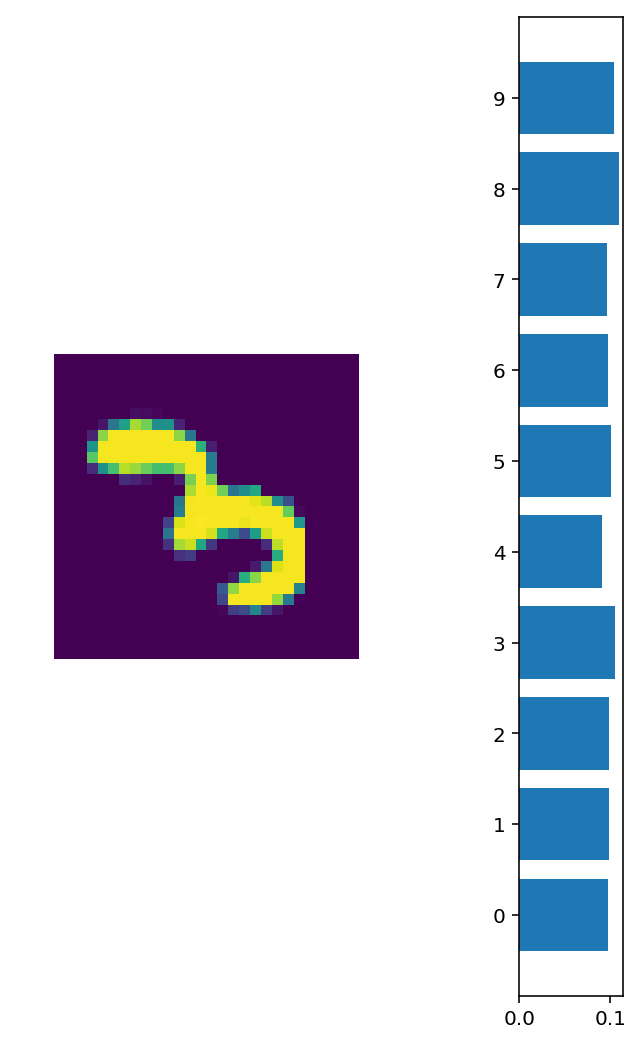

In [9]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

images.resize_(64, 1, 784)

image_index = 0
ps = model.forward(images[image_index, :])

image = images[image_index]
utils.view_classify(image.view(1, 28, 28), ps)

Pues, nuestra red no es muy inteligente... Lo cual es de esperar debido a que no la hemos entrenado aún.

### Otra manera de construir redes

Si eres un aficionado a la programación funcional o te encanta el API `Sequential` de Keras, entonces la próxima celda se te hará familiar.

Básicamente, estamos definiendo nuestra red como un lista de capas u operaciones por las cuales el tensor de entrada deberá pasar en secuencia.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


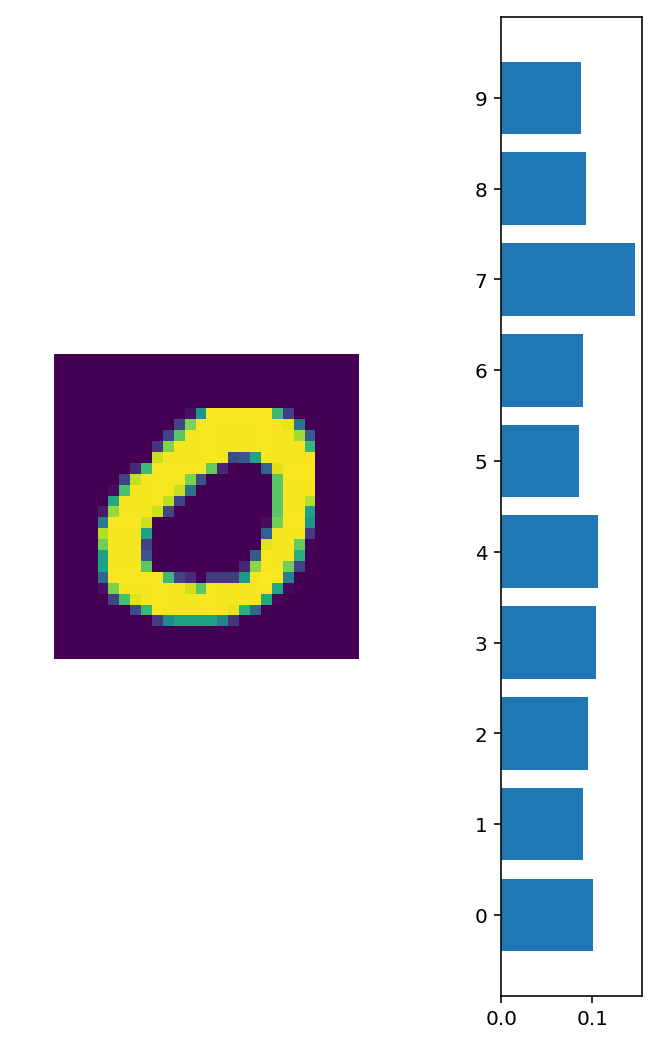

In [10]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)

El problema con esta manera de crear una red neuronal es que terminamos con índices en vez de nombres asociados a cada operación. Podemos solucionar esto pasándole un `OrderedDict` al constructor de `nn.Sequential`. Cada elemento en un `OrderedDict` será un par de la forma (_nombre de la operación_, _operación_)

In [11]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, hidden_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('output', nn.Linear(hidden_sizes[1], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=128, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=128, out_features=64, bias=True)
  (relu_2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

Solo por diversión, creemos una red más compleja.

In [12]:
input_size = 784
layer_sizes = [400, 200, 100]
output_size = 10

model = model = nn.Sequential(OrderedDict(
            [('fully_connected_1', nn.Linear(input_size, layer_sizes[0])),
             ('relu_1', nn.ReLU()),
             ('fully_connected_2', nn.Linear(layer_sizes[0], layer_sizes[1])),
             ('relu_2', nn.ReLU()),
             ('fully_connected_3', nn.Linear(layer_sizes[1], layer_sizes[2])),
             ('relu_3', nn.ReLU()),
             ('output', nn.Linear(layer_sizes[2], output_size)),
             ('softmax', nn.Softmax(dim=1))]))

model

Sequential(
  (fully_connected_1): Linear(in_features=784, out_features=400, bias=True)
  (relu_1): ReLU()
  (fully_connected_2): Linear(in_features=400, out_features=200, bias=True)
  (relu_2): ReLU()
  (fully_connected_3): Linear(in_features=200, out_features=100, bias=True)
  (relu_3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)

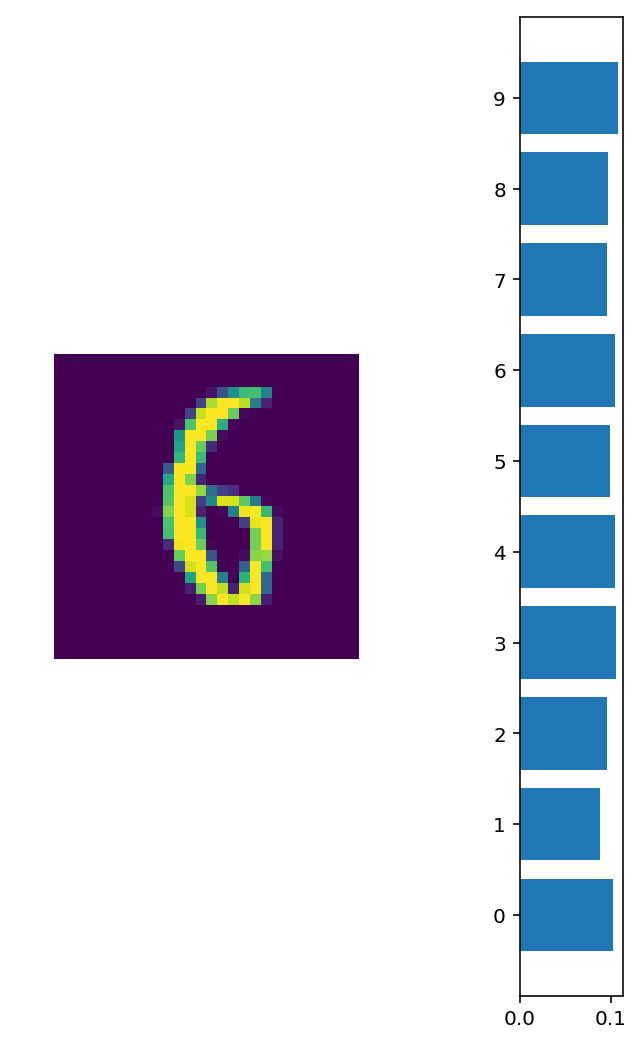

In [13]:
images, labels = next(iter(train_loader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
utils.view_classify(images[0].view(1, 28, 28), ps)